In [4]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [ ]:
# Load YOLOv8 model
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 21.3MB/s]


In [ ]:
# Define file path
filename = "cars.jpg"

In [ ]:
# Read image with cv2
image = cv2.imread(filename)

In [ ]:
# Detect object with yolo
results = model(image)


0: 288x640 6 cars, 1 truck, 124.0ms
Speed: 9.9ms preprocess, 124.0ms inference, 1.8ms postprocess per image at shape (1, 3, 288, 640)


In [ ]:
boxes = results[0].boxes.xyxy.cpu().numpy()  # Bounding boxes
confidences = results[0].boxes.conf.cpu().numpy()  # Confidence scores
class_ids = results[0].boxes.cls.cpu().numpy()  # Class IDs
labels = [model.names[int(class_id)] for class_id in class_ids]  # Class labels

In [ ]:
for i, box in enumerate(boxes):
    cv2.rectangle(image, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 255, 0), 2) # Draw a rectangle around the detected object
    cv2.putText(image, f"{labels[i]} {confidences[i]:.2f}", (int(box[0]), int(box[1])-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2) # Add the label and confidence score above the rectangle

In [ ]:
output_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

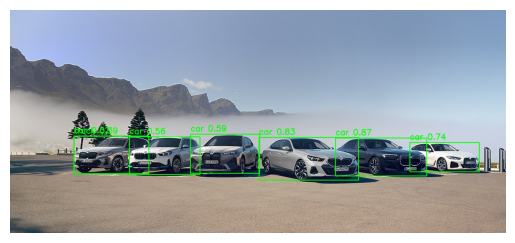

In [ ]:
plt.imshow(output_image)
plt.axis('off')
plt.show()

In [ ]:
car_count = labels.count('car')
print(f'Number of cars detected in the picture: {car_count}')

Number of cars detected in the picture: 6
